# 실습 

### 통신회사의 고객 이탈 여부를 logistic regression 으로 예측

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

churn_df = pd.read_csv("datasets/ChurnData.csv")

## Data pre-processing and feature selection

개별 feature 에 대한 분석 후(본 과정에서는 생략)에 Logistic Regression 에 사용할 feature 선정

tenure(가입기간), age (연령), income(수입) 으로 예측하고 churn (이탈여부) 은 integer 로 type 변경

In [2]:
churn_df.head()

tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0    11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2    23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4     7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   

   longmon  ...  pager  internet  callwait  confer  ebill  loglong  logtoll  \
0     4.40  ...    1.0       0.0       1.0     1.0    0.0    1.482    3.033   
1     9.45  ...    0.0       0.0       0.0     0.0    0.0    2.246    3.240   
2     6.30  ...    0.0       0.0       0.0     1.0    0.0    1.841    3.240   
3     6.05  ...    1.0       1.0       1.0     1.0    1.0    1.800    3.807   
4     7.10  ...    0.0       0.0       1.0     1.0    0.0    1.960    3.091   

   lninc  custcat  churn  
0  4.913      4.0    1.0  
1  3.497      1.0    1.0  
2  3.401      3.0    0.0  
3  4.331      4.0    0.0  
4  4.382      3.0    0.0  

[5 rows x 28 columns]

In [3]:
churn_df = churn_df[['tenure', 'age', 'income', 'churn']]
churn_df['churn'] = churn_df['churn']
churn_df.head()

tenure   age  income  churn
0    11.0  33.0   136.0    1.0
1    33.0  33.0    33.0    1.0
2    23.0  30.0    30.0    0.0
3    38.0  35.0    76.0    0.0
4     7.0  35.0    80.0    0.0

In [4]:
X = churn_df[['tenure', 'age', 'income']]
y = churn_df['churn']

### Train/Test dataset 분리

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### data scaling

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
clf = LogisticRegression()

clf.fit(X_train, y_train.values.ravel())

y_pred = clf.predict(X_test)

In [8]:
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print("confution matrix\n", cm)
print()
print("f1 score\n", f1_score(y_test, y_pred, labels=[1,0]))
print()
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred)))

confution matrix
 [[ 4  6]
 [ 1 29]]

f1 score
 0.5333333333333333

Accuracy: 0.82
Precision: 0.80
Recall: 0.40


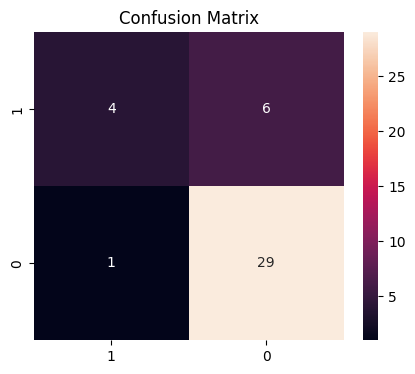

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))

ax = sns.heatmap(cm, annot=True, xticklabels=[1, 0], yticklabels=[1, 0])
ax.set_title('Confusion Matrix')
None